In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-unemployment-analysis-ega-octavina/__results__.html
/kaggle/input/global-unemployment-analysis-ega-octavina/cleaned_global_unemployment.csv
/kaggle/input/global-unemployment-analysis-ega-octavina/__notebook__.ipynb
/kaggle/input/global-unemployment-analysis-ega-octavina/__output__.json
/kaggle/input/global-unemployment-analysis-ega-octavina/custom.css
/kaggle/input/global-unemployment-data/global_unemployment_data.csv


# 🌍 Global Unemployment Analysis (1991–2021)

**Author:** Ega Octavina  
**Goal:** Perform data cleaning and basic exploratory analysis of global unemployment trends to gain insights useful for economic understanding and practice data analysis skills.  
**Dataset:** [Kaggle: Global Unemployment Data](https://www.kaggle.com/datasets/sazidthe1/global-unemployment-data)


In [2]:
import pandas as pd

# STEP 1: Load the dataset
df = pd.read_csv("/kaggle/input/global-unemployment-data/global_unemployment_data.csv")

# STEP 2: Reshape the data (wide to long)
df_long = pd.melt(
    df,
    id_vars=['country_name', 'indicator_name', 'sex', 'age_group', 'age_categories'],
    value_vars=['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'],
    var_name='Year',
    value_name='Unemployment Rate'
)

# STEP 3: Convert Year to integer
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce').astype('Int64')

# STEP 4: Convert Unemployment Rate to float
df_long['Unemployment Rate'] = pd.to_numeric(df_long['Unemployment Rate'], errors='coerce')

# STEP 5: Drop rows with missing unemployment rates (optional but useful)
df_long = df_long.dropna(subset=['Unemployment Rate'])

# STEP 6: Inspect the cleaned data
print(df_long.info())
df_long.head()


<class 'pandas.core.frame.DataFrame'>
Index: 12444 entries, 0 to 12473
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country_name       12444 non-null  object 
 1   indicator_name     12444 non-null  object 
 2   sex                12444 non-null  object 
 3   age_group          12444 non-null  object 
 4   age_categories     12444 non-null  object 
 5   Year               12444 non-null  Int64  
 6   Unemployment Rate  12444 non-null  float64
dtypes: Int64(1), float64(1), object(5)
memory usage: 789.9+ KB
None


,country_name,indicator_name,sex,age_group,age_categories,Year,Unemployment Rate
0,Afghanistan,Unemployment rate by sex and age,Female,15-24,Youth,2014,13.340
1,Afghanistan,Unemployment rate by sex and age,Female,25+,Adults,2014,8.576
2,Afghanistan,Unemployment rate by sex and age,Female,Under 15,Children,2014,10.306
3,Afghanistan,Unemployment rate by sex and age,Male,15-24,Youth,2014,9.206
4,Afghanistan,Unemployment rate by sex and age,Male,25+,Adults,2014,6.463


In [3]:
df_long.info()
df_long.describe()
df_long.head()


<class 'pandas.core.frame.DataFrame'>
Index: 12444 entries, 0 to 12473
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country_name       12444 non-null  object 
 1   indicator_name     12444 non-null  object 
 2   sex                12444 non-null  object 
 3   age_group          12444 non-null  object 
 4   age_categories     12444 non-null  object 
 5   Year               12444 non-null  Int64  
 6   Unemployment Rate  12444 non-null  float64
dtypes: Int64(1), float64(1), object(5)
memory usage: 789.9+ KB


,country_name,indicator_name,sex,age_group,age_categories,Year,Unemployment Rate
0,Afghanistan,Unemployment rate by sex and age,Female,15-24,Youth,2014,13.340
1,Afghanistan,Unemployment rate by sex and age,Female,25+,Adults,2014,8.576
2,Afghanistan,Unemployment rate by sex and age,Female,Under 15,Children,2014,10.306
3,Afghanistan,Unemployment rate by sex and age,Male,15-24,Youth,2014,9.206
4,Afghanistan,Unemployment rate by sex and age,Male,25+,Adults,2014,6.463


In [4]:
# Check Missing Values
df_long.isnull().sum()


country_name         0
indicator_name       0
sex                  0
age_group            0
age_categories       0
Year                 0
Unemployment Rate    0
dtype: int64

In [5]:
# Unique Values Per Column
print("Countries:", df_long['country_name'].nunique())
print("Indicators:", df_long['indicator_name'].unique())
print("Sex categories:", df_long['sex'].unique())
print("Age groups:", df_long['age_group'].unique())


Countries: 189
Indicators: ['Unemployment rate by sex and age']
Sex categories: ['Female' 'Male']
Age groups: ['15-24' '25+' 'Under 15']


In [6]:
#  Reshape Wide to Long Format Properly
# Columns representing years
year_columns = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

# Melt the dataset: convert year columns into one 'year' column
df_long = df.melt(
    id_vars=['country_name', 'indicator_name', 'sex', 'age_group', 'age_categories'],
    value_vars=year_columns,
    var_name='year',
    value_name='unemployment_rate'
)

# Convert 'year' to int and 'unemployment_rate' to float
df_long['year'] = df_long['year'].astype(int)
df_long['unemployment_rate'] = pd.to_numeric(df_long['unemployment_rate'], errors='coerce')

# Confirm the result
print(df_long.info())
df_long.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12474 entries, 0 to 12473
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country_name       12474 non-null  object 
 1   indicator_name     12474 non-null  object 
 2   sex                12474 non-null  object 
 3   age_group          12474 non-null  object 
 4   age_categories     12474 non-null  object 
 5   year               12474 non-null  int64  
 6   unemployment_rate  12444 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 682.3+ KB
None


,country_name,indicator_name,sex,age_group,age_categories,year,unemployment_rate
0,Afghanistan,Unemployment rate by sex and age,Female,15-24,Youth,2014,13.340
1,Afghanistan,Unemployment rate by sex and age,Female,25+,Adults,2014,8.576
2,Afghanistan,Unemployment rate by sex and age,Female,Under 15,Children,2014,10.306
3,Afghanistan,Unemployment rate by sex and age,Male,15-24,Youth,2014,9.206
4,Afghanistan,Unemployment rate by sex and age,Male,25+,Adults,2014,6.463


In [7]:
# Global average unemployment rate by year
global_trend = df_long.groupby('year')['unemployment_rate'].mean().reset_index()

# Preview the trend
print(global_trend)


    year  unemployment_rate
0   2014          11.387800
1   2015          11.272444
2   2016          11.122963
3   2017          10.863516
4   2018          10.516499
5   2019          10.311452
6   2020          11.851285
7   2021          11.422645
8   2022          10.340361
9   2023           9.985181
10  2024           9.940089


In [8]:
# ANALYZE Top 10 Countries by Average Unemployment
# Calculate average unemployment per country
top_countries = df_long.groupby('country_name')['unemployment_rate'].mean().reset_index()

# Sort descending
top_countries = top_countries.sort_values(by='unemployment_rate', ascending=False)

# Show top 10
print(top_countries.head(10))


                country_name  unemployment_rate
45                  Djibouti          42.561576
128  Palestinian Territories          34.316019
154             South Africa          31.782045
97                     Libya          31.120258
53                  Eswatini          30.078288
59                     Gabon          26.494470
37                     Congo          26.420742
19    Bosnia and Herzegovina          26.204424
20                  Botswana          25.972167
159                    Sudan          25.942803


In [9]:
# ANALYZE Compare Unemployment Between Sexes
# Average unemployment by sex per year
gender_gap = df_long.groupby(['year', 'sex'])['unemployment_rate'].mean().reset_index()

print(gender_gap.head())


   year     sex  unemployment_rate
0  2014  Female          12.507709
1  2014    Male          10.267891
2  2015  Female          12.413287
3  2015    Male          10.131601
4  2016  Female          12.291407


In [10]:
# ANALYZE Filter for a Country
indonesia_data = df_long[df_long['country_name'] == 'Indonesia']

# Check first few rows
indonesia_data.head()


,country_name,indicator_name,sex,age_group,age_categories,year,unemployment_rate
462,Indonesia,Unemployment rate by sex and age,Female,15-24,Youth,2014,16.530
463,Indonesia,Unemployment rate by sex and age,Female,25+,Adults,2014,1.453
464,Indonesia,Unemployment rate by sex and age,Female,Under 15,Children,2014,3.882
465,Indonesia,Unemployment rate by sex and age,Male,15-24,Youth,2014,15.736
466,Indonesia,Unemployment rate by sex and age,Male,25+,Adults,2014,1.986


In [11]:
# Save cleaned data
df_long.to_csv('cleaned_global_unemployment.csv', index=False)


Visualization

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


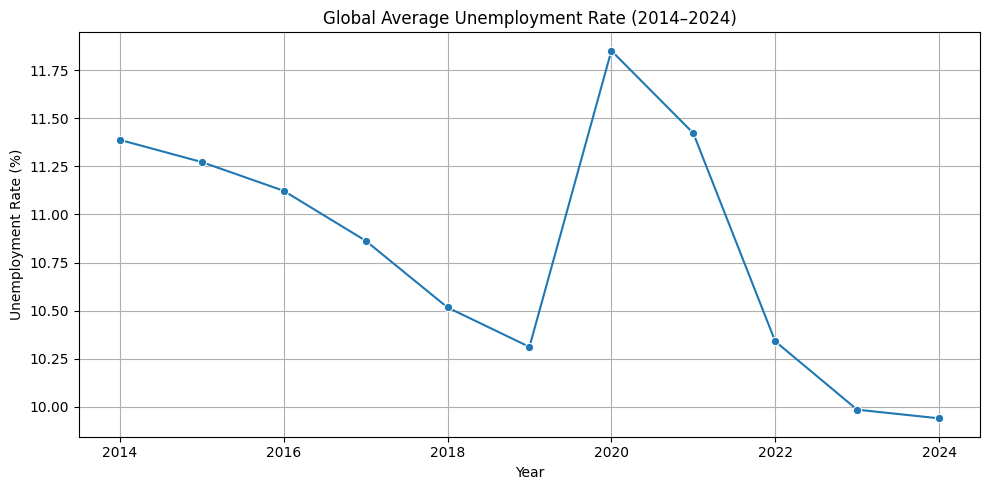

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by year and calculate average unemployment rate
global_trend = df_long.groupby('year')['unemployment_rate'].mean().reset_index()

# Plotting the trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=global_trend, x='year', y='unemployment_rate', marker='o')
plt.title('Global Average Unemployment Rate (2014–2024)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

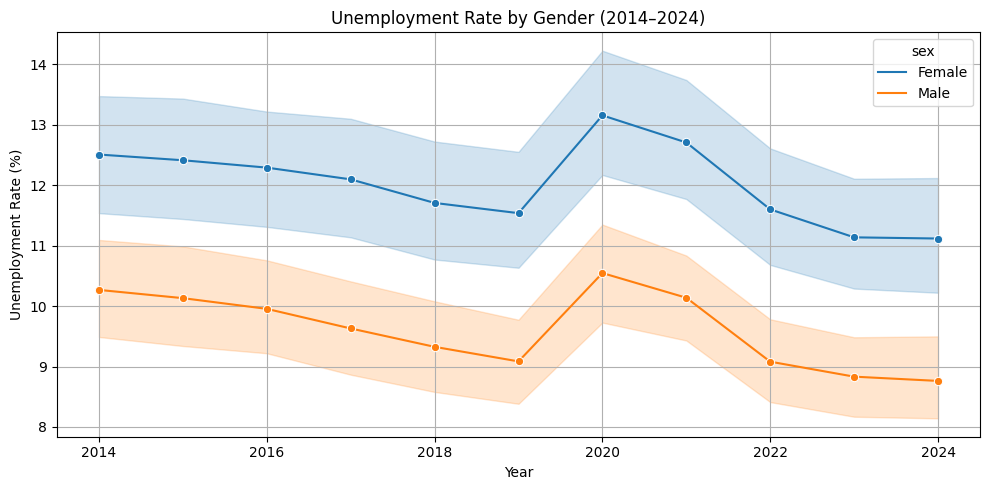

In [18]:
# Unemployment Trend by Gender

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_long, x='year', y='unemployment_rate', hue='sex', marker='o')
plt.title('Unemployment Rate by Gender (2014–2024)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

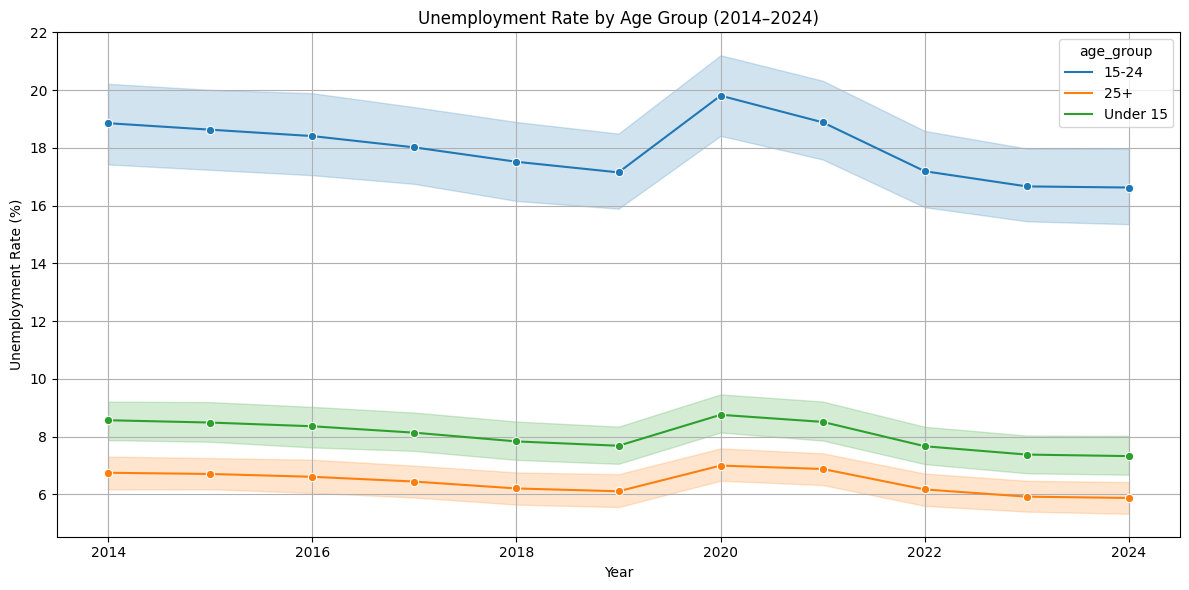

In [19]:
# Unemployment Rate by Age Group Over Time

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='year', y='unemployment_rate', hue='age_group', marker='o')
plt.title('Unemployment Rate by Age Group (2014–2024)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


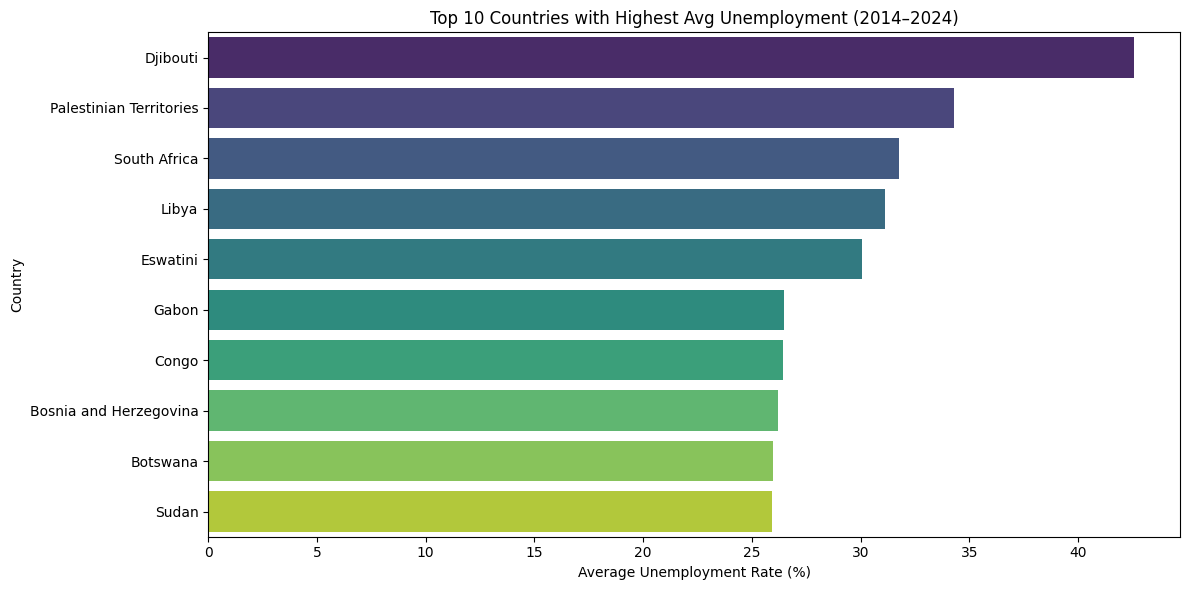

In [20]:
# Top 10 Countries with Highest Average Unemployment (2014-2024)

# Calculate mean unemployment per country
top10_countries = (
    df_long.groupby('country_name')['unemployment_rate']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top10_countries, x='unemployment_rate', y='country_name', palette='viridis')
plt.title('Top 10 Countries with Highest Avg Unemployment (2014–2024)')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()
